#  Gender Classification using CNN Transfer Learning on Kaggle Dataset

#### Group ELU (S12):
#### - ESQUIVEL, Vince Anthony
#### - LIM, Mark Willbur
#### - UY, Justin Riley

## Introduction

The main objective of this notebook is to see how CNN Transfer Learning is used together along with a gender classification dataset to create a deep learning model that can reliably predict the correct data. We will utilizing a Kaggle Dataset containing 58,000~ male and female images in total separated by its training and validation sets. The dataset could be found [here.](https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset)

We will utilize the Keras package to create our CNN Transfer Learning Model and train it using our Gender Classification Dataset. You can read and find out more about Keras through its documentation [here.](https://keras.io/about/) 
  
The objective of this project is to compare the data from four (4) pre-trained CNN models and its performance after being trained and validated on our Gender Classification Dataset.

## Requirements from Rubric (dont delete muna)

An overview or description of the data is provided, including how it was collected, and its implications on the types of conclusions that could be made from the data. A description of the variables, observations, and/or structure of the data is provided. The target task is well introduced and clearly defined.

The data is sufficiently explored to get a grasp of the distribution and the content of the data. Appropriate summaries and visualizations are presented. Insights into how the EDA can help the model training is mentioned.

The necessary steps for preprocessing and cleaning are performed, including explanations for every step. If no preprocessing or cleaning is done, there is a justification on why it was not needed.

The appropriate models are used to accomplish the machine learning task. Justification of choosing the models is shown.

Appropriate data-driven error analysis is made, and changes to the model selection and hyperparameters are performed to improve model performance. The study exhausts improvements that can be done to the model

The study is concluded by effectively summarizing the efforts of the authors. Recommendations on how the model could be further improved are provided.

## About the Dataset

The Gender Classification Dataset is taken from Kaggle.com which could be found [here.]( https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset) There is no specified source for the data but upon further inspection it could be assumed that the images were taken from the internet and cropped to a specific dimension for all images to follow.
    
The dataset contains the following data: 
   
1.) **Test Set**  
- **Male training image set** - 23766 images  
- **Female training image set** - 23243 images  
2.) **Validation Set**
- **Male valid image set** - 5808 images  
- **Female valid image set** - 5841 images 

Due to the nature of the dataset, both test and validation sets for each class are mostly male and most female with only a miniscule count of the images coming from the wrong class. The ratio of the training and validation image sets is roughly **80:20** which is the optimal split for training and validation sets. All the images come in **.png** format and come in slightly different dimensions but are measured roughly at around 80 x 100 pixels.

With this, we will be utilizing this dataset in order to see its performance in different CNN transfer learning models using different pre-trained models to see which would perform as the best.

## Importing Required Libraries
The most important package required for this notebook is Keras which we will use to form our models. Keras will also provide the pre-trained models we will utilize for the transfer learning portion of our CNN model as well as provide a means to read our data from the folders. You can learn more about Keras from their API documentation [here.](https://keras.io/about/)

In [2]:
import numpy as np
import cv2
import PIL
import PIL.Image as Image
import os

from glob import glob

# For checkpoints and time computation
from datetime import datetime
from keras.callbacks import ModelCheckpoint

import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

## Exploratory Data Analysis

### Loading Images for Exploratory Data Analysis

In [3]:
import os 

tm_path = './train/male'
tf_path = './train/female'
vm_path = './valid/male'
vf_path = './valid/female'

male_train = [f for f in os.listdir(tm_path) if os.path.isfile(os.path.join(tm_path, f))]
print("Read {0} images from the training male set.".format(len(male_train)))

female_train = [f for f in os.listdir(tf_path) if os.path.isfile(os.path.join(tf_path, f))]
print("Read {0} images from the training female set.".format(len(female_train)))

male_valid = [f for f in os.listdir(vm_path) if os.path.isfile(os.path.join(vm_path, f))]
print("Read {0} images from the validation male set.".format(len(male_valid)))

female_valid = [f for f in os.listdir(vf_path) if os.path.isfile(os.path.join(vf_path, f))]
print("Read {0} images from the validation female set.".format(len(female_valid)))

Read 23766 images from the training male set.
Read 23243 images from the training female set.
Read 5808 images from the validation male set.
Read 5841 images from the validation female set.


### Subplotting Images from each Image Set

The images shown below are randomly selected images from each image set. As mentioned previously, the test and validaton datasets are mostly male and female with only a small amount of the images being from a different class. Due to the inconsistency in printing random images from each set, we will display the frist 16 samples from the male training, female training, male validation, and female validation set respectively as a 4x4 grid.

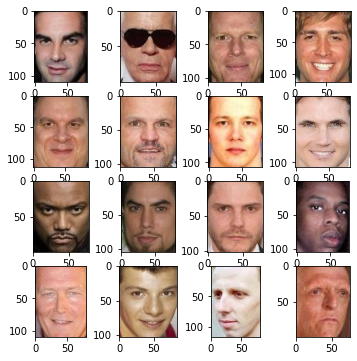

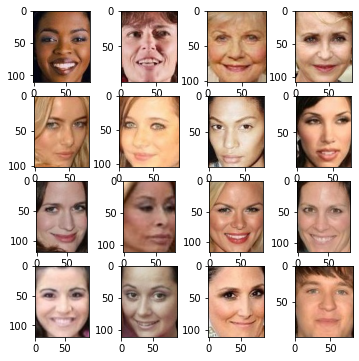

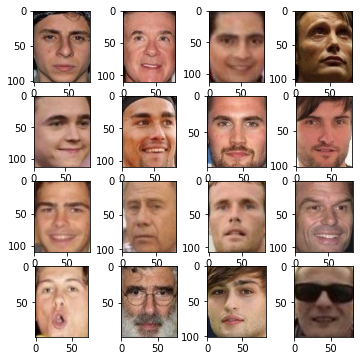

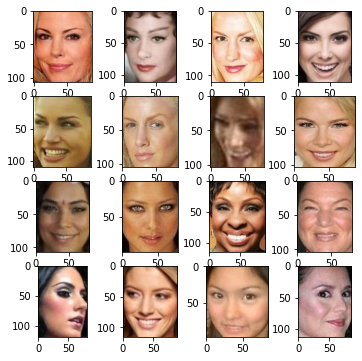

In [37]:
w = 10
h = 10

columns = 4
rows = 4

fig = plt.figure(figsize=(6, 6))
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    img = mpimg.imread(tm_path + "/" + male_train[i])
    plt.imshow(img)

plt.show()

fig = plt.figure(figsize=(6, 6))
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    img = mpimg.imread(tf_path + "/" + female_train[i])
    plt.imshow(img)
plt.show()

fig = plt.figure(figsize=(6, 6))
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    img = mpimg.imread(vm_path + "/" + male_valid[i])
    plt.imshow(img)
plt.show()

fig = plt.figure(figsize=(6, 6))
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    img = mpimg.imread(vf_path + "/" + female_valid[i])
    plt.imshow(img)
plt.show()

### Image Counts for Training and Validation Sets

We mentioned earlier that the image counts of each test and validation set are different however this fine since the difference is negligible due to two reasons. First, the optimal ratio of training to validation data is still followed with an **80:20** split. Second, even when given the argument that the size of the image set is small, we will fix this during pre-processing before we train our model. We will utilize data augmentation to increase the size of our data set artificially through Keras.

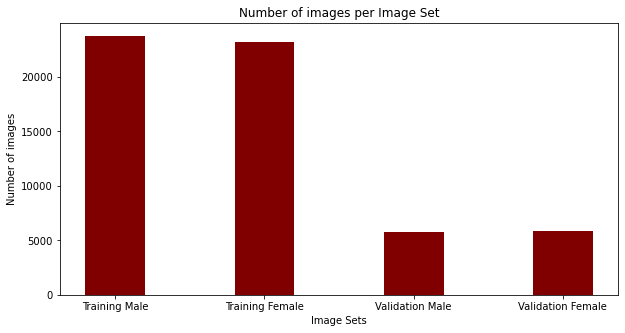

In [7]:
data = {'Training Male': len(male_train), 'Training Female': len(female_train), 'Validation Male': len(male_valid),
        'Validation Female':len(female_valid)}

fig = plt.figure(figsize = (10, 5))

courses = list(data.keys())
values = list(data.values())

plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Image Sets")
plt.ylabel("Number of images")
plt.title("Number of images per Image Set")
plt.show()

## Choosing our Pre-trained Models
In CNN Transfer Learning, the bare minimum requirement is to utilize a pre-trained model that has been trained under a certain image set. When we chose our pre-trained models, we utilized the available architectures present in the Keras API. Details on all their available pre-trained models could be found [here.](https://keras.io/api/applications/) By using pre-trained models, we make our job of creating a CNN Transfer Learning model easier as the architecture for the model is provided to you already; it also results in having a better overall accuracy since the model has already been trained beforehand. The models we will be using have differ in the image set they are trained under, the layers present in the model, and the number of parameters in the model.

When we chose our pre-trained models, we took into account different factors (chosen through in no particular order) such as performance, popularity, number of parameters, and through suggestions of other independent entities online. VGG16 (and another variation, VGG19) is considered to be one of the most popular and well rounded pre-trained models which is why we chose to use them for this project. EfficientNetB0 was the model with the least amount of parameters but was known also for its good performance in CNN. Lastly, we chose Xception since like the other two models, it was frequently used in classification CNN models and served as the middleground in terms of the number of parameters between VGG16/VGG19 and Xception.

## CNN Model Process Pipeline
In Convolutional Neural Network models, there are a lot of parameters to consider. In order to keep things fair between all pre-trained models, we had to follow a specific process pipeline that will be used by all the models.

1.) Set up Data Augmentation using `ImageDataGenerator`.  
<br>
- Data augmentation is a technique that can be used to artificially increase the amount of training data with the current amount of data available through modifying the aforementioned data.
- We chose specific values that were around the recommended values for Data Augmention, increasing the value beyond the suggested values can be damaging instead of beneficial for the dataset. We chose to focus more on the `zoom_range` and `shear_range` parameters since it affects the sizing and cropping of the image once it has been resized.
- This will be our ONLY pre-processing step as the inital image size does not matter as we define the `target_size` of the image when we read from for the next step.
<br>
2.) Read images using `flow_from_directory`.
<br>
- `flow_from_directory` takes a `directory` as an argument pointing to the data you will utilize. It automatically knows the amount of classes found in the directory which is depending on how many folders are in the directory. The `target_size` are the dimensions the images that are being read will be resized to; the optimal size for each model is dependent from model to model.
<br>
3.) Import pre-trained models and form the Keras Model.
<br>
- Keras has a list of available pre-trained models that we can import through their API. We will use this to perform transfer learning in our CNN model.
<br>
4.) Freeze all layers of the model except the output layer.
<br>
- Freezing all the layers except the output layers means that the weights will not be updated until the output layer. This method reduces overfitting with the dataset.
<br>
5.) Perform hyperparameter tuning using `KerasTuner`.
<br>
- Hyperparameter tuning optimizes our model by choosing the best possible hyperparameters for our model. We performed hyperparameter tuning for our `Adam` optimizer which is an optimization algorithm for deep learning models.
- We will be optimizing the learning rate for our optimizers on all models. The learning rates we will be choosing from are `0.01, 0.0001, 0.000001`.
- Due to time constraints, we will be performing hyperparameter tuning over three (3) epochs with one trial with two tests per hyperparameter.
<br>
6.) Take the best performing hyperparameter model, set up checkpoints, and perform `model.fit` using training and validation data.
<br>
- After performing hyperparameter tuning we will take the best performing model using our Tuner and fit the model using our training and validation data. We will utilize checkpoints in order to track the progress through each epoch while the model is being fit.
- The struture of each model is dependent on the pre-trained models as the overall layers may differ but we made the output layers consistent throughout all models.
- We flattened the output layer of the pre-trained model in order to get a layer with `N` neurons where `N` is the output of the pre-trained model. We then call a dropout layer which helps with the overall overfitting of the model. Lastly, we called a dense layer so the output of our model will be dependent on the number of classes we have which in our case is two (2). We chose `sigmoid` as our activation functions as it is suited for binary classification.
<br>
7.) Graph the test accuracy and validation accuracy per epoch then evaluate model using the validation data.
<br>
- After we perform `model.fit` we will now graph the performance of the model per epoch and evaluate the model using our validation data. This will give us an idea of how the model performed overall.
<br>

## Using VGG16 Model

VGG16 is a CNN model that consists of 13 convolutional layers, and three dense layers. It is currently the most preferred choice for extracting features from images due to its very uniform architecture. Due to its high classification accuracy of 92.7% from 1000 images of 1000 different categories, we decided to use this as our initial model.

### Pre-processing Data using Data Augmentation

In [38]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input as vgg16_preprocess

train_datagen = ImageDataGenerator(
    preprocessing_function=vgg16_preprocess,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(
    preprocessing_function=vgg16_preprocess,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True)


### Reading Train and Validation Images

In [39]:
train_set_vgg16 = train_datagen.flow_from_directory('./train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

valid_set_vgg16 = test_datagen.flow_from_directory('./valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


### Building Keras Model with VGG16

In [40]:
from keras import optimizers
from keras_tuner import RandomSearch
from keras.layers import Input, Lambda, Dense, Flatten, Dropout, Conv2D, MaxPooling2D
folders = glob('./train/**')

vgg16 = VGG16(input_shape=(224, 224, 3), pooling='avg', weights='imagenet', include_top=False)

for layer in vgg16.layers:
  layer.trainable = False

def build_model_vgg16(hp):
    x = Flatten()(vgg16.output)
    prediction = Dropout(0.25)(x)
    prediction = Dense(len(folders), activation='sigmoid')(prediction)
    model_vgg16 = Model(inputs=vgg16.input, outputs=prediction)
    model_vgg16.compile(loss='binary_crossentropy',
                        optimizer=optimizers.Adam(hp.Choice('learning_rate',
                        values=[1e-2, 1e-4, 1e-6])),
                        metrics=['accuracy'])
    return model_vgg16

### Performing Hyperparameter Tuning using Keras Tuner

In [41]:
tuner_vgg16 = RandomSearch(
        build_model_vgg16,
        objective='val_accuracy',
        max_trials = 3,
        executions_per_trial= 2,
        directory='STINTSY-Gender-Classification',
        project_name='VGG16_Hyperparameter_Tuning')

tuner_vgg16.search(train_set_vgg16, epochs = 3, validation_data = valid_set_vgg16)

INFO:tensorflow:Reloading Oracle from existing project STINTSY-Gender-Classification\VGG16_Hyperparameter_Tuning\oracle.json
INFO:tensorflow:Reloading Tuner from STINTSY-Gender-Classification\VGG16_Hyperparameter_Tuning\tuner0.json
INFO:tensorflow:Oracle triggered exit


### Displaying Summary of Best Model and Displaying the Trainable Layers

In [42]:
best_model_vgg16 = tuner_vgg16.get_best_models()[0]

best_model_vgg16.summary()

for i, layer in enumerate(best_model_vgg16.layers):
    print(i, layer.name, layer.trainable)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Displaying the Best Hyperparameter

In [45]:
tuner_vgg16.results_summary(num_trials=3)

Results summary
Results in STINTSY-Gender-Classification\VGG16_Hyperparameter_Tuning
Showing 3 best trials
Trial summary
Hyperparameters:
learning_rate: 0.0001
Score: 0.8681432008743286
Trial summary
Hyperparameters:
learning_rate: 0.01
Score: 0.8613615036010742
Trial summary
Hyperparameters:
learning_rate: 1e-06
Score: 0.550862729549408


### Set up Checkpoints and Fit the Model using the Dataset

In [8]:
checkpoint = ModelCheckpoint(filepath='vgg16.h5',
                             save_best_only=True,
                             monitor= 'val_accuracy',
                             mode = 'max')

start = datetime.now()

batch_size = 512
len_batchsize = len(train_set_vgg16.filenames)//batch_size
history_vgg16 = best_model_vgg16.fit(train_set_vgg16, epochs = 10, validation_data = valid_set_vgg16,
                    steps_per_epoch= len_batchsize,
                    validation_steps= len_batchsize,
                    callbacks= [checkpoint]
                    )

duration_vgg16 = datetime.now() - start
print("Training completed in time: ", duration_vgg16)

Epoch 1/10
91/91 [==============================] - 36s 398ms/step - loss: 0.4220 - accuracy: 0.8310 - val_loss: 0.3487 - val_accuracy: 0.8585
Epoch 2/10
91/91 [==============================] - 36s 393ms/step - loss: 0.4321 - accuracy: 0.8252 - val_loss: 0.3399 - val_accuracy: 0.8620
Epoch 3/10
91/91 [==============================] - 36s 394ms/step - loss: 0.4300 - accuracy: 0.8355 - val_loss: 0.3375 - val_accuracy: 0.8726
Epoch 4/10
91/91 [==============================] - 35s 391ms/step - loss: 0.4250 - accuracy: 0.8386 - val_loss: 0.3444 - val_accuracy: 0.8644
Epoch 5/10
91/91 [==============================] - 36s 393ms/step - loss: 0.4310 - accuracy: 0.8283 - val_loss: 0.3410 - val_accuracy: 0.8626
Epoch 6/10
91/91 [==============================] - 36s 392ms/step - loss: 0.4122 - accuracy: 0.8324 - val_loss: 0.3464 - val_accuracy: 0.8633
Epoch 7/10
91/91 [==============================] - 35s 391ms/step - loss: 0.3906 - accuracy: 0.8510 - val_loss: 0.3465 - val_accuracy: 0.8626

### Visualize Accuracy and Loss Values per Epoch

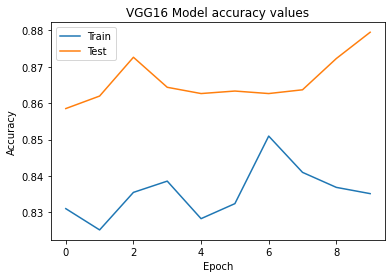

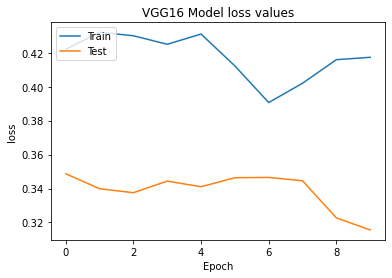

In [9]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('VGG16 Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history_vgg16.history['loss'])
plt.plot(history_vgg16.history['val_loss'])
plt.title('VGG16 Model loss values')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Evaluate the Best Model using Validation Data

In [10]:
test_loss, test_acc = best_model_vgg16.evaluate(valid_set_vgg16, steps=50)
print('test acc:', test_acc)
print('test_loss:',test_loss)

50/50 [==============================] - 10s 193ms/step - loss: 0.3169 - accuracy: 0.8719
test acc: 0.871874988079071
test_loss: 0.316890150308609


# Using Keras Xception Model

The Xception Model is a CNN model based from the inception model. Other CNN models had to stack convolution layers deeper and deeper until they get better performance. The inception model put the layers all together into one model. It consists of repeating modules also known as inception modules. These modules contain 1x1, 3x3, and 5x5 convolutional layers, pooling layers, concatenations, and dropouts. The Xception model takes the inception model to the extreme. Instead of partitioning the data into chunks, it maps the spatial correlations for each output channel separately then performs depthwise convolution. With this, Xception performs better at larger datasets compared to Inception.

### Pre-processing Data using Data Augmentation

In [51]:
from keras.applications.xception import preprocess_input as xception_preprocess

train_datagen = ImageDataGenerator(
                preprocessing_function=xception_preprocess,
                rotation_range=30,
                shear_range=0.3,
                zoom_range=0.3,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(
                preprocessing_function=xception_preprocess,
                rotation_range=30,
                shear_range=0.3,
                zoom_range=0.3,
                horizontal_flip=True)

### Reading Train and Validation Images

In [52]:
train_set_xception = train_datagen.flow_from_directory('./train',
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

valid_set_xception = test_datagen.flow_from_directory('./valid',
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


### Building Keras Model with Xception

In [53]:
from tensorflow.keras.applications import Xception

xception = Xception(include_top=False, pooling='avg', weights='imagenet', input_shape=(299,299,3))

for layer in xception.layers:
  layer.trainable = False

def build_model_xception(hp):
    x = Flatten()(xception.output)
    prediction = Dropout(0.25)(x)
    prediction = Dense(len(folders), activation='sigmoid')(prediction)
    model_xception = Model(inputs=xception.input, outputs=prediction)
    model_xception.compile(loss='binary_crossentropy',
                        optimizer=optimizers.Adam(hp.Choice('learning_rate',
                        values=[1e-2, 1e-4, 1e-6])),
                        metrics=['accuracy'])
    return model_xception

### Performing Hyperparameter Tuning using Keras Tuner

In [54]:
tuner_xception = RandomSearch(
        build_model_xception,
        objective='val_accuracy',
        max_trials=3,
        executions_per_trial=2,
        directory='STINTSY-Gender-Classification',
        project_name='Xception_Hyperparameter_Tuning')

tuner_xception.search(train_set_xception, epochs = 3, validation_data = valid_set_xception)

INFO:tensorflow:Reloading Oracle from existing project STINTSY-Gender-Classification\Xception_Hyperparameter_Tuning\oracle.json
INFO:tensorflow:Reloading Tuner from STINTSY-Gender-Classification\Xception_Hyperparameter_Tuning\tuner0.json
INFO:tensorflow:Oracle triggered exit


### Displaying Summary of Best Model and Displaying the Trainable Layers

In [16]:
best_model_xception = tuner_xception.get_best_models()[0]

best_model_xception.summary()
for i, layer in enumerate(best_model_xception.layers):
    print(i, layer.name, layer.trainable)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

 block4_sepconv1_bn (BatchNorma  (None, 37, 37, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 37, 37, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 37, 37, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 37, 37, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 19, 19, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 19, 19, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 19, 19, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 19, 19, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 19, 19, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 19, 19, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 19, 19, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 19, 19, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 19, 19, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 19, 19, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

### Displaying the Best Hyperparameter

In [55]:
tuner_xception.results_summary(num_trials=3)

Results summary
Results in STINTSY-Gender-Classification\Xception_Hyperparameter_Tuning
Showing 3 best trials
Trial summary
Hyperparameters:
learning_rate: 0.01
Score: 0.8833376467227936
Trial summary
Hyperparameters:
learning_rate: 0.0001
Score: 0.8622199296951294
Trial summary
Hyperparameters:
learning_rate: 1e-06
Score: 0.6240878999233246


### Set up Checkpoints and Fit the Model using the Dataset

In [17]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('xception.h5',
                                             save_best_only = True,
                                             monitor= 'val_accuracy',
                                             mode = 'max')

start = datetime.now()

batch_size = 512
len_batchsize = len(train_set_xception.filenames)//batch_size
history1 = best_model_xception.fit(train_set_xception, epochs= 10, validation_data= valid_set_xception,
                    steps_per_epoch= len_batchsize,
                    validation_steps= len_batchsize,
                    callbacks= [checkpoint]
                    )

duration_xception = datetime.now() - start
print("Training completed in time: ", duration_xception)

Epoch 1/10
91/91 [==============================] - 66s 713ms/step - loss: 0.3514 - accuracy: 0.8626 - val_loss: 0.2758 - val_accuracy: 0.8839
Epoch 2/10
91/91 [==============================] - 65s 714ms/step - loss: 0.3517 - accuracy: 0.8585 - val_loss: 0.2750 - val_accuracy: 0.8911
Epoch 3/10
91/91 [==============================] - 64s 709ms/step - loss: 0.3691 - accuracy: 0.8520 - val_loss: 0.2847 - val_accuracy: 0.8812
Epoch 4/10
91/91 [==============================] - 64s 711ms/step - loss: 0.3648 - accuracy: 0.8585 - val_loss: 0.2728 - val_accuracy: 0.8905
Epoch 5/10
91/91 [==============================] - 64s 711ms/step - loss: 0.3631 - accuracy: 0.8479 - val_loss: 0.2826 - val_accuracy: 0.8905
Epoch 6/10
91/91 [==============================] - 64s 707ms/step - loss: 0.3552 - accuracy: 0.8602 - val_loss: 0.3433 - val_accuracy: 0.8595
Epoch 7/10
91/91 [==============================] - 64s 709ms/step - loss: 0.3500 - accuracy: 0.8592 - val_loss: 0.2792 - val_accuracy: 0.8884

### Visualize Accuracy and Loss Values per Epoch

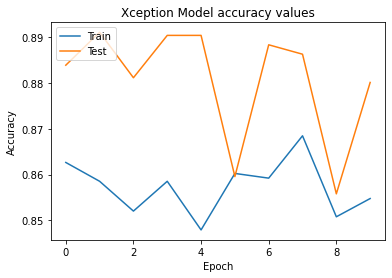

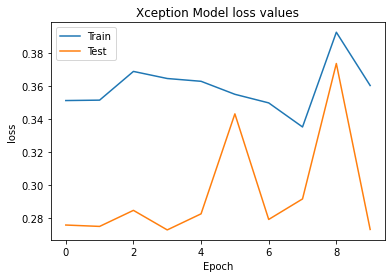

In [18]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Xception Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Xception Model loss values')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show() 

### Evaluate the Best Model using Validation Data

In [19]:
test_loss, test_acc = best_model_xception.evaluate(valid_set_xception, steps=50)
print('test acc:', test_acc)
print('test_loss:',test_loss)

50/50 [==============================] - 18s 351ms/step - loss: 0.2733 - accuracy: 0.8781
test acc: 0.878125011920929
test_loss: 0.2733263671398163


## Using VGG19 Model
VGG19 is a variant of the VGG16 model that consists of 19 layers instead of 16, adding three more convolutional layers. As there are more layers, the model should be able to fit more complex functions, so it promises better performance compared to VGG16.

### Pre-processing Data using Data Augmentation

In [46]:
from keras.applications.vgg19 import preprocess_input as vgg19_preprocess

train_datagen = ImageDataGenerator(
                preprocessing_function = vgg19_preprocess,
                rotation_range=30,
                shear_range=0.3,
                zoom_range=0.3,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(
                preprocessing_function = vgg19_preprocess,
                rotation_range=30,
                shear_range=0.3,
                zoom_range=0.3,
                horizontal_flip=True)

### Reading Train and Validation Images

In [47]:
train_set_vgg19 = train_datagen.flow_from_directory('./train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

valid_set_vgg19 = test_datagen.flow_from_directory('./valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


### Building Keras Model with VGG19

In [48]:
from keras.applications.vgg19 import VGG19
from keras_tuner import RandomSearch

folders = glob('./train/**')

vgg19 = VGG19(input_shape=(224, 224, 3), pooling='avg',weights='imagenet', include_top=False)

for layer in vgg19.layers:
  layer.trainable = False


def build_model_vgg19(hp):
    x = Flatten()(vgg19.output)
    prediction = Dropout(0.25)(x)
    prediction = Dense(len(folders), activation='sigmoid')(prediction)
    model_vgg19 = Model(inputs=vgg19.input, outputs=prediction)
    model_vgg19.compile(loss='binary_crossentropy',
                        optimizer=optimizers.Adam(hp.Choice('learning_rate',
                        values=[1e-2, 1e-4, 1e-6])),
                        metrics=['accuracy'])
    return model_vgg19

### Performing Hyperparameter Tuning using Keras Tuner

In [49]:
tuner_vgg19 = RandomSearch(
        build_model_vgg19,
        objective='val_accuracy',
        max_trials=3,
        executions_per_trial=2,
        directory='STINTSY-Gender-Classification',
        project_name='VGG19_Hyperparameter_Tuning')

tuner_vgg19.search(train_set_vgg19, epochs = 3, validation_data = valid_set_vgg19)

INFO:tensorflow:Reloading Oracle from existing project STINTSY-Gender-Classification\VGG19_Hyperparameter_Tuning\oracle.json
INFO:tensorflow:Reloading Tuner from STINTSY-Gender-Classification\VGG19_Hyperparameter_Tuning\tuner0.json
INFO:tensorflow:Oracle triggered exit


### Displaying Summary of Best Model and Displaying the Trainable Layers

In [24]:
best_model_vgg19 = tuner_vgg19.get_best_models()[0]

best_model_vgg19.summary()
for i, layer in enumerate(best_model_vgg19.layers):
    print(i, layer.name, layer.trainable)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Displaying the Best Hyperparameter

In [50]:
tuner_vgg19.results_summary(num_trials=3)

Results summary
Results in STINTSY-Gender-Classification\VGG19_Hyperparameter_Tuning
Showing 3 best trials
Trial summary
Hyperparameters:
learning_rate: 0.0001
Score: 0.8757833242416382
Trial summary
Hyperparameters:
learning_rate: 0.01
Score: 0.870890200138092
Trial summary
Hyperparameters:
learning_rate: 1e-06
Score: 0.5371705740690231


### Set up Checkpoints and Fit the Model using the Dataset

In [25]:
checkpoint = ModelCheckpoint(filepath='vgg19.h5', 
                            save_best_only=True,
                            monitor= 'val_accuracy',
                            mode = 'max')

callbacks = [checkpoint]

start = datetime.now()

batch_size = 512
len_batchsize = len(train_set_vgg19.filenames)//batch_size
history_vgg19 = best_model_vgg19.fit(train_set_vgg19, epochs = 10, validation_data = valid_set_vgg19,
                    steps_per_epoch= len_batchsize,
                    validation_steps= len_batchsize,
                    callbacks= callbacks
                    )


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10
91/91 [==============================] - 37s 400ms/step - loss: 0.3951 - accuracy: 0.8462 - val_loss: 0.3360 - val_accuracy: 0.8726
Epoch 2/10
91/91 [==============================] - 36s 400ms/step - loss: 0.4135 - accuracy: 0.8424 - val_loss: 0.3403 - val_accuracy: 0.8671
Epoch 3/10
91/91 [==============================] - 36s 399ms/step - loss: 0.3987 - accuracy: 0.8413 - val_loss: 0.3373 - val_accuracy: 0.8764
Epoch 4/10
91/91 [==============================] - 36s 401ms/step - loss: 0.4121 - accuracy: 0.8362 - val_loss: 0.3349 - val_accuracy: 0.8774
Epoch 5/10
91/91 [==============================] - 36s 396ms/step - loss: 0.4076 - accuracy: 0.8327 - val_loss: 0.3240 - val_accuracy: 0.8815
Epoch 6/10
91/91 [==============================] - 36s 396ms/step - loss: 0.3993 - accuracy: 0.8365 - val_loss: 0.3163 - val_accuracy: 0.8719
Epoch 7/10
91/91 [==============================] - 36s 398ms/step - loss: 0.4044 - accuracy: 0.8459 - val_loss: 0.3271 - val_accuracy: 0.8774

### Visualize Accuracy and Loss Values per Epoch

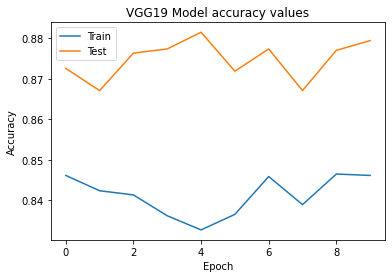

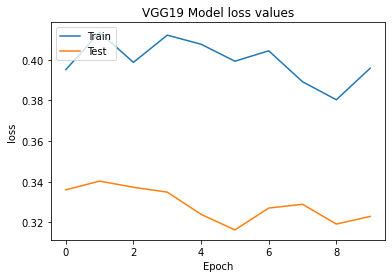

In [26]:
plt.plot(history_vgg19.history['accuracy'])
plt.plot(history_vgg19.history['val_accuracy'])
plt.title('VGG19 Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history_vgg19.history['loss'])
plt.plot(history_vgg19.history['val_loss'])
plt.title('VGG19 Model loss values')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show() 

### Evaluate the Best Model using Validation Data

In [27]:
test_loss, test_acc = best_model_vgg19.evaluate(valid_set_vgg19, steps=50)
print('test acc:', test_acc)
print('test_loss:',test_loss)

50/50 [==============================] - 10s 198ms/step - loss: 0.3418 - accuracy: 0.8637
test acc: 0.8637499809265137
test_loss: 0.34177154302597046


## EfficientNetB0

EfficientNet is a CNN model that uses a technique called compound coefficient to scale up the models. What this does is that it scales up one dimension at a time to figure out the best dimensions for each image. These three dimensions are width, depth, and image resolution. With that, EfficientNet is considered as the most powerful CNN model which is why we considered using it for our dataset.

### Pre-processing Data using Data Augmentation

In [56]:
from keras.applications.efficientnet import preprocess_input as enet_preprocess

train_datagen = ImageDataGenerator(
    preprocessing_function= enet_preprocess,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(
    preprocessing_function= enet_preprocess,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True)

### Reading Train and Validation Images

In [57]:
train_set_enet = train_datagen.flow_from_directory('./train',
                                                 target_size = (255, 255),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

valid_set_enet = test_datagen.flow_from_directory('./valid',
                                            target_size = (255, 255),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


### Building Keras Model with EfficientNetB0

In [58]:
from tensorflow.keras.applications import EfficientNetB0

enet = EfficientNetB0(include_top=False, pooling='avg', weights='imagenet', input_shape=(255,255,3))

for layer in enet.layers:
  layer.trainable = False

def build_model_enet(hp):
    x = Flatten()(enet.output)
    prediction = Dropout(0.25)(x)
    prediction = Dense(len(folders), activation='sigmoid')(prediction)
    model_enet = Model(inputs=enet.input, outputs=prediction)
    model_enet.compile(loss='binary_crossentropy',
                        optimizer=optimizers.Adam(hp.Choice('learning_rate',
                        values=[1e-2, 1e-4, 1e-6])),
                        metrics=['accuracy'])
    return model_enet

16705208/16705208 [==============================] - 1s 0us/step


### Performing Hyperparameter Tuning using Keras Tuner

In [59]:
tuner_enet = RandomSearch(
        build_model_enet,
        objective='val_accuracy',
        max_trials=3,
        executions_per_trial=2,
        directory='STINTSY-Gender-Classification',
        project_name='Enet_Hyperparameter_Tuning')

tuner_enet.search(train_set_enet, epochs = 3, validation_data = valid_set_enet)

INFO:tensorflow:Reloading Oracle from existing project STINTSY-Gender-Classification\Enet_Hyperparameter_Tuning\oracle.json
INFO:tensorflow:Reloading Tuner from STINTSY-Gender-Classification\Enet_Hyperparameter_Tuning\tuner0.json
INFO:tensorflow:Oracle triggered exit


### Displaying Summary of Best Model and Displaying the Trainable Layers

In [32]:
best_model_enet = tuner_enet.get_best_models()[0]

best_model_enet.summary()
for i, layer in enumerate(best_model_enet.layers):
    print(i, layer.name, layer.trainable)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 255, 255, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 255, 255, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 255, 255, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 255, 255, 3)  0           ['normalization[0][0]']      

 block2a_project_conv (Conv2D)  (None, 64, 64, 24)   2304        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 64, 64, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 64, 64, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 64, 64, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_e

 block3b_expand_bn (BatchNormal  (None, 32, 32, 240)  960        ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 32, 32, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 32, 32, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 32, 32, 240)  960        ['block3b_dwconv[0][0]']         
 )        

 D)                                                              ']                               
                                                                                                  
 block4b_bn (BatchNormalization  (None, 16, 16, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 16, 16, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block5a_activation (Activation  (None, 16, 16, 480)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_s

 block5c_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 16, 16, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 16, 16, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 16, 16, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_d

 block6b_project_bn (BatchNorma  (None, 8, 8, 192)   768         ['block6b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_drop (Dropout)         (None, 8, 8, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 8, 8, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 8, 8, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_e

 block6d_add (Add)              (None, 8, 8, 192)    0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 8, 8, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 8, 8, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 8, 8, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
          

NameError: name 'enum' is not defined

### Displaying the Best Hyperparameter

In [60]:
tuner_enet.results_summary(num_trials=3)

Results summary
Results in STINTSY-Gender-Classification\Enet_Hyperparameter_Tuning
Showing 3 best trials
Trial summary
Hyperparameters:
learning_rate: 0.01
Score: 0.9109794795513153
Trial summary
Hyperparameters:
learning_rate: 0.0001
Score: 0.885741263628006
Trial summary
Hyperparameters:
learning_rate: 1e-06
Score: 0.6047300398349762


### Set up Checkpoints and Fit the Model using the Dataset

In [33]:
checkpoint = ModelCheckpoint(filepath='enet.h5',
                             save_best_only=True,
                             monitor= 'val_accuracy',
                             mode = 'max')

start = datetime.now()

batch_size = 512
len_batchsize = len(train_set_enet.filenames)//batch_size
history_enet = best_model_enet.fit(train_set_enet, epochs = 10, validation_data = valid_set_enet,
                    steps_per_epoch= len_batchsize,
                    validation_steps= len_batchsize,
                    callbacks= [checkpoint]
                    )

duration_enet = datetime.now() - start
print("Training completed in time: ", duration_enet)

Epoch 1/10
91/91 [==============================] - 50s 513ms/step - loss: 0.3184 - accuracy: 0.8729 - val_loss: 0.2271 - val_accuracy: 0.9090
Epoch 2/10
91/91 [==============================] - 46s 505ms/step - loss: 0.3204 - accuracy: 0.8723 - val_loss: 0.2182 - val_accuracy: 0.9155
Epoch 3/10
91/91 [==============================] - 46s 502ms/step - loss: 0.2992 - accuracy: 0.8836 - val_loss: 0.2198 - val_accuracy: 0.9131
Epoch 4/10
91/91 [==============================] - 46s 504ms/step - loss: 0.3108 - accuracy: 0.8815 - val_loss: 0.2519 - val_accuracy: 0.8929
Epoch 5/10
91/91 [==============================] - 46s 503ms/step - loss: 0.3197 - accuracy: 0.8743 - val_loss: 0.2275 - val_accuracy: 0.9131
Epoch 6/10
91/91 [==============================] - 46s 502ms/step - loss: 0.2888 - accuracy: 0.8822 - val_loss: 0.2331 - val_accuracy: 0.9076
Epoch 7/10
91/91 [==============================] - 45s 499ms/step - loss: 0.3025 - accuracy: 0.8874 - val_loss: 0.2281 - val_accuracy: 0.9032

### Visualize Accuracy and Loss Values per Epoch

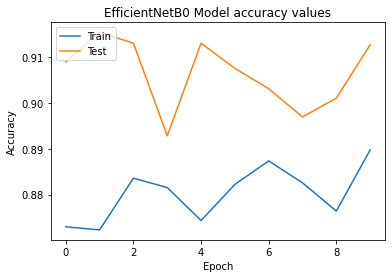

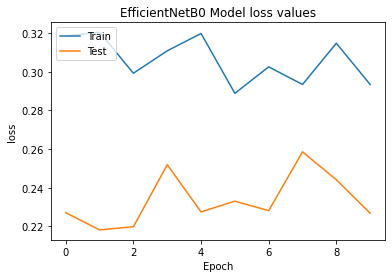

In [34]:
plt.plot(history_enet.history['accuracy'])
plt.plot(history_enet.history['val_accuracy'])
plt.title('EfficientNetB0 Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history_enet.history['loss'])
plt.plot(history_enet.history['val_loss'])
plt.title('EfficientNetB0 Model loss values')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Evaluate the Best Model using Validation Data

In [35]:
test_loss, test_acc = best_model_enet.evaluate(valid_set_enet, steps=50)
print('test acc:', test_acc)
print('test_loss:',test_loss)

50/50 [==============================] - 13s 259ms/step - loss: 0.2135 - accuracy: 0.9100
test acc: 0.9100000262260437
test_loss: 0.2135317176580429


## Insights and Conclusions

#### Which was the best performing pre-trained model for CNN?
Based on our testing, we calculated the following validation accuracies per model using **`model.evaluate`** which checks whether the model is best fit for the given problem and corresponding data. We performed this on our best model that we got through hyperparameter tuning. The results we gained through evaluating the best model differs very slightly through every new test but the results shown below should give a rough idea on how each pre-trained model performs overall.  

**1.) VGG16 Model**  
Accuracy: 0.871874988079071~
<br>
Loss: 0.316890150308609~  
  
**2.) VGG19 Model**  
Accuracy: 0.8637499809265137~ 
<br>
Loss: 0.34177154302597046~    
  
**3.) Xception Model**  
Accuracy: 0.878125011920929~   
<br>
Loss: 0.2733263671398163~    
  
**4.) EfficientNetB0**  
Accuracy: 0.9100000262260437~    
<br>
Loss: 0.2135317176580429~    
  
Overall, using the CNN model under various pre-trained models, all of the models performed well when evaluated using the validation set. All models had a low prediction error ranging from about 0.2 to 0.3. VGG16 was expected to be the best performing model initially due to its notoriety in being a well rounded model however VGG16 and its successor, VGG19 had the lowest performing models when evaluated with the validation set. The Xception model came close with a small different in its loss value where as the EfficientNetB0 model has the best performance in terms of both accuracy and loss value. 

Before performing the training and testing for each model, we ensured everything aside from the model itself remained consistent through out every CNN model. Data augmentation, hyperparameter tuning, and the structure of the Keras model was consistent through all the CNN models. This brings us to look at the specifics of each pre-trained model. As mentioned in the previous cell, we chose each pre-trained model based on different factors which included its prevalance and usage in CNN models and the amount of parameters it has. VGG16 and VGG19 both have a similar amount of parameters having 138.4M total parameters and 143.7M total parameters according to the official documentation. Xception on the other hand has 22.9M parameters while EfficientNetB0 has the lowest amount of parameters with only 5.3M. We can observe from the accuracy and loss results alone that the amount of parameters present in the pre-trained model may have an effect on its performance on the gender classification dataset. As the amount of parameters goes lower, the loss value of each model also goes lower.  

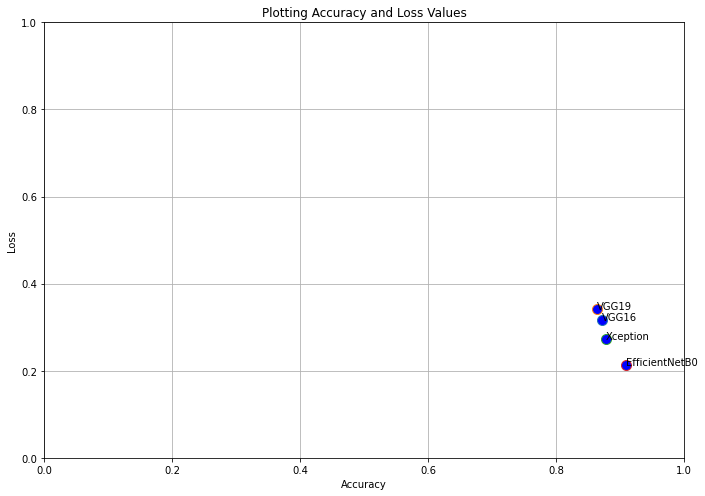

In [19]:
plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True
x = [0.871874988079071, 0.8637499809265137, 0.878125011920929, 0.9100000262260437]
y = [0.316890150308609, 0.34177154302597046, 0.2733263671398163, 0.2135317176580429]
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title ("Plotting Accuracy and Loss Values")
plt.xlabel("Accuracy")
plt.ylabel("Loss")
plt.grid()

plt.plot(x[0], y[0], marker="o", markersize=10, linestyle='None', markerfacecolor="blue")
plt.text (x[0], y[0], "VGG16")

plt.plot(x[1], y[1], marker="o", markersize=10, linestyle='None', markerfacecolor="blue")
plt.text (x[1], y[1], "VGG19")

plt.plot(x[2], y[2], marker="o", markersize=10, linestyle='None', markerfacecolor="blue")
plt.text (x[2], y[2], "Xception")

plt.plot(x[3], y[3], marker="o", markersize=10, linestyle='None', markerfacecolor="blue")
plt.text (x[3], y[3], "EfficientNetB0")

plt.show()

Using the code cell above, we graphed the accuracy and loss values of each model and we can see quite clearly that **EfficientNetB0** leads the models in terms of accuracy and loss values, which is why it is our **best performing model**.

#### Analyzing the Learning Rate and Model Training Efficiency
**VGG16 Model**  
Best Hyperparameter: 0.0001  
`Training completed in time:  5 mins 56 secs`  
**VGG19 Model**  
Best Hyperparameter: 0.0001  
`Training completed in time:  6 mins 2 secs`  
**Xception Model**  
Best Hyperparameter: 0.01  
`Training completed in time:  10 mins 46 secs`  
**EfficientNetB0 Model**  
Best Hyperparameter: 0.01  
`Training completed in time:  7 mins 4 secs`  